In [19]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import scipy.stats as stats
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
df = pd.read_csv("proyectoData.csv")
# Vemos las dimensiones del dataframe (numero de entidades x numero de variables/atributos/dimensiones)
print(df.shape)
# Vemos los primeros 5 elementos del dataframe
print(df.head(5))
# Vemos los ultimos 5 elementos del dataframe
print(df.tail(5))
# Vemos el tipo de dato de cada variable
print(df.dtypes)
# Numero de entidades que posse cada variable
print(df.count())

(100000, 27)
      full_name         a         e   G          i          om           w  \
0    (1162 T-1)  3.069911  0.096918 NaN  10.633999  344.778698  248.285216   
1  (2000 WV173)  3.126769  0.101765 NaN  14.228075   93.358911   74.972094   
2   (2010 PE41)  3.240195  0.114902 NaN  13.278967  230.808838  255.060949   
3  (1999 TF222)  3.118650  0.062830 NaN   8.379401  225.435675  212.341581   
4   (2003 WG74)  3.032740  0.104018 NaN   3.158993  315.183440  183.530613   

          q        ad     per_y  ...  GM  BV  UB  IR spec_B  spec_T  neo  pha  \
0  2.772381  3.367440  5.378941  ... NaN NaN NaN NaN    NaN     NaN    N    N   
1  2.808575  3.444963  5.529068  ... NaN NaN NaN NaN    NaN     NaN    N    N   
2  2.867890  3.612501  5.832637  ... NaN NaN NaN NaN    NaN     NaN    N    N   
3  2.922706  3.314594  5.507545  ... NaN NaN NaN NaN    NaN     NaN    N    N   
4  2.717281  3.348198  5.281544  ... NaN NaN NaN NaN    NaN     NaN    N    N   

      moid  Danger  
0  1.78504

In [21]:
df.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,100000.000000,100000.000000,83.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99902.000000,100000.000000,100000.000000,99450.000000,99106.000000,8102.000000,1.100000e+01,709.000000,682.000000,1.00,100000.000000
mean,2.819038,0.145543,0.167711,10.344061,169.924458,182.058342,2.403482,3.234594,4.937754,8908.106835,0.484030,658.833930,15.177686,0.129811,23.544204,9.842549e+00,0.769980,0.365937,-0.33,1.421062
std,1.760668,0.077871,0.124483,6.858150,102.822356,103.548530,0.526588,3.377844,29.938933,6154.446093,1.964323,581.571406,1.407306,0.109804,76.128838,1.858589e+01,0.087671,0.095493,NaN,0.522498
min,0.626226,0.000489,-0.120000,0.042710,0.001246,0.004466,0.081882,1.014592,0.495569,1.000000,0.000000,5.000000,3.200000,0.001000,0.178400,2.100000e-09,0.590000,0.140000,-0.33,0.000166
25%,2.537189,0.089637,0.090000,5.133894,82.345523,92.120240,2.069336,2.865376,4.041453,6266.000000,0.000000,213.000000,14.400000,0.053000,4.679745,1.375016e-03,0.700000,0.290000,-0.33,1.083310
50%,2.751635,0.138359,0.160000,9.380594,160.593713,184.062419,2.364758,3.168414,4.564514,7486.000000,0.000000,482.000000,15.300000,0.078000,7.576300,1.530000e+00,0.745000,0.363500,-0.33,1.385575
75%,3.092673,0.191216,0.250000,13.720630,256.692874,271.961960,2.686752,3.469412,5.438876,9630.000000,0.000000,956.000000,16.100000,0.187000,14.663000,1.065000e+01,0.850000,0.440000,-0.33,1.699682
max,389.145964,0.984348,0.510000,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,9325.000000,27.000000,1.000000,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,39.507000


In [22]:
# Vamos a elminar algunas dimensiones que no nos interesan

# Dropping
df = df.drop(["full_name", "IR", "extent", "GM", "spec_B", "spec_T", "neo","pha",], axis=1)
# Vamos a verificar si ahora tenemos X dimensiones menos
print(df.shape)
# todo ok... :)

(100000, 19)


In [23]:
# Vamos a verificar si existen entidades repetidas en la base de datos (con todos sus atributos identicos, inlcuso el "#")

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
# No hay entidades duplicadas... por lo tanto el codigo de abajo no lo vamos a ocupar (el codigo de abajo eliminaba todas las entidades repetidas)
#df = df.drop_duplicates()
# Numero de entidades que posse cada variable
# print(df.count())

number of duplicate rows:  (0, 19)


In [24]:
# Vamos a ver si existen entidades que tengan alguna variable sin informacion (de pasos anteriores sabemos que si existen)

# Finding the null values.
print(df.isnull().sum())

# Podriamos tomar varias aproximaciones a este problema (como las vistas en clase), en este caso vamos a usar la mas facil
# eliminar toda entidad que no tenga todos sus datos completos (otra opcion podria ser rellenar los campos incompletos con la media, o una categoria aleatoria, o simplemente dejarlo vacio y que el modelo se encargue de asumir alguna accion)

# Eliminamos
df = df.dropna() 

# Comtamos nuevamente, para ver si toda va bien
print(df.count())
# Verificamos que no existan entidades con campos NA
print(df.isnull().sum()) 

# Bien :) ahora tenemos las dimensiones que queremos, sabemos que no existen datos nulos y que tampoco existe entidades repeditas
# recordar que esto es un ejemplo, puede ser que las decisiones tomadas hasta el momento sean un ERROR horrible en un contexto diferente 
# (ejemplo eliminar los NA nos reduce a la mitad el numero de entidades... puede que esto sea realmente malo, todo depende de nuestro objetivo)

a                     0
e                     0
G                 99917
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc             98
condition_code        0
n_obs_used            0
H                   550
albedo              894
rot_per           91898
BV                99291
UB                99318
moid                  0
Danger                0
dtype: int64
a                 79
e                 79
G                 79
i                 79
om                79
w                 79
q                 79
ad                79
per_y             79
data_arc          79
condition_code    79
n_obs_used        79
H                 79
albedo            79
rot_per           79
BV                79
UB                79
moid              79
Danger            79
dtype: int64
a                 0
e                 0
G                 0
i                 0
om                0
w                 0

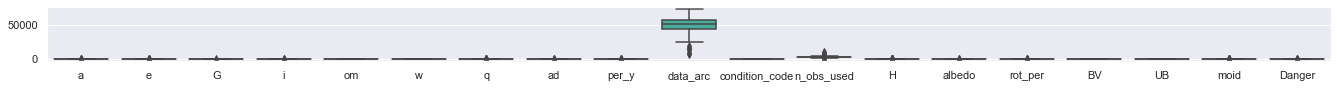

In [25]:
plt.figure(figsize=(23,1))
sns.boxplot(data=df);

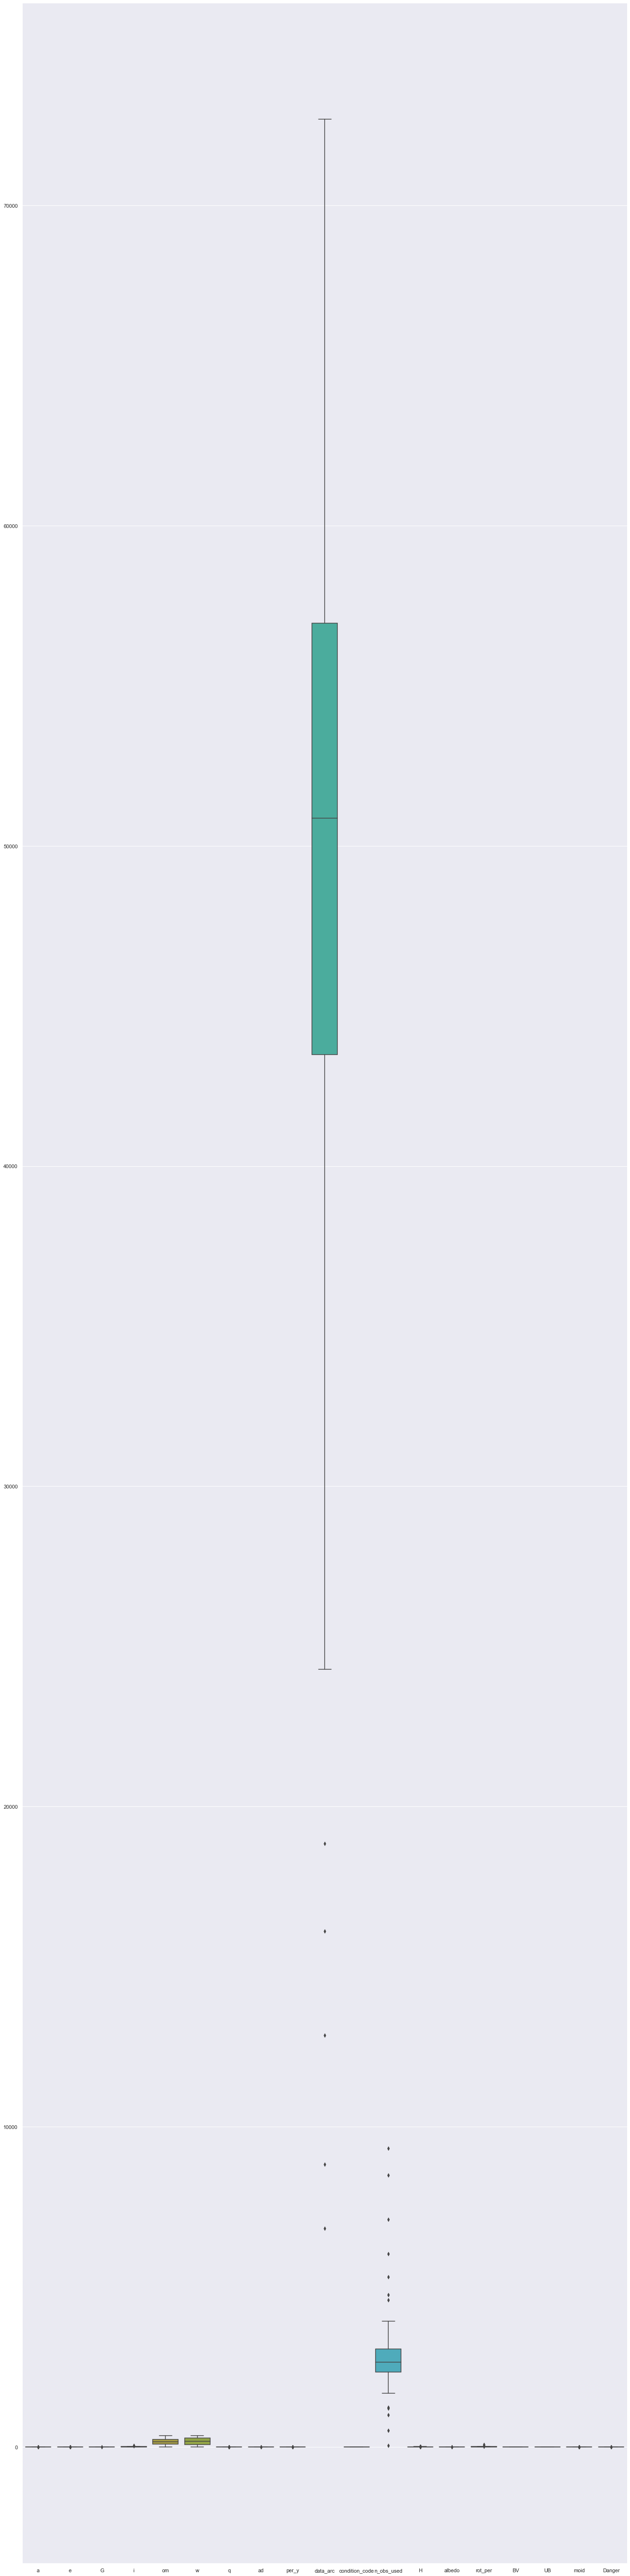

In [26]:
plt.figure(figsize=(23,100))
sns.boxplot(data=df);

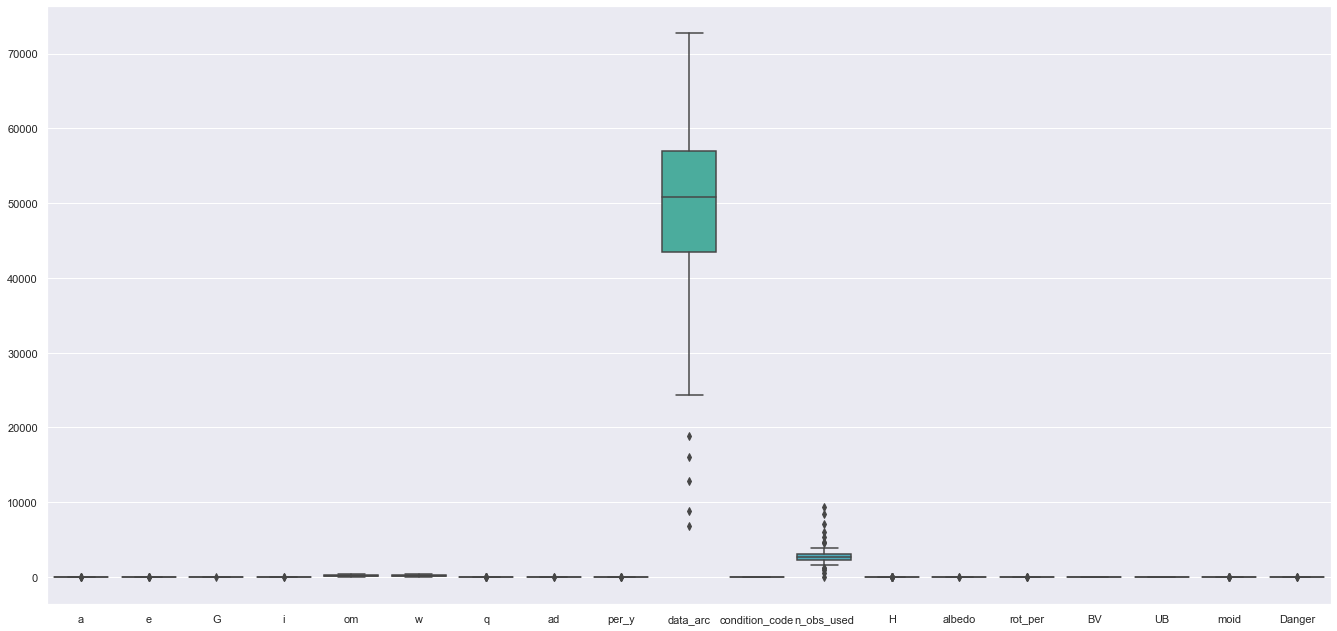

In [27]:
plt.figure(figsize=(23,11))
sns.boxplot(data=df);

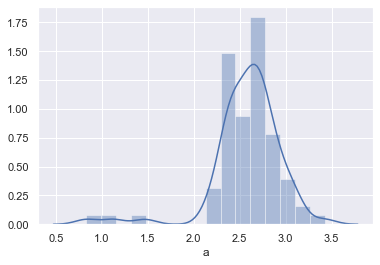

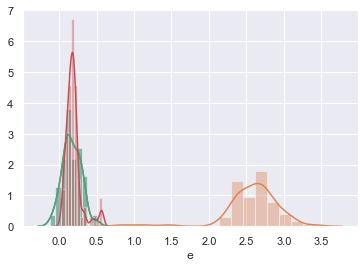

In [28]:
# Podemos indagar en la distribucion mas detallada de cada variable numerica

# De manera individual
plt.figure()
sns.distplot(df['a'])
plt.figure()
sns.distplot(df['G'])

# O sobrepuesta
#plt.figure()
sns.distplot(df['a'])
sns.distplot(df['G'])
sns.distplot(df['e'])


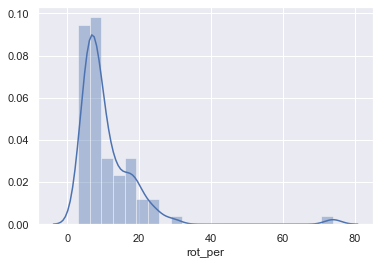

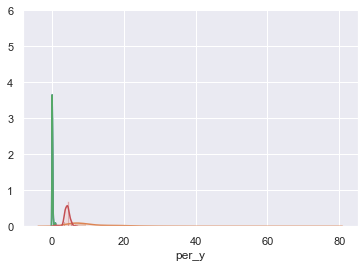

In [29]:
# Podemos indagar en la distribucion mas detallada de cada variable numerica

# De manera individual
plt.figure()
sns.distplot(df['rot_per'])
plt.figure()
sns.distplot(df['albedo'])

# O sobrepuesta
#plt.figure()
sns.distplot(df['rot_per'])
sns.distplot(df['albedo'])
sns.distplot(df['per_y'])


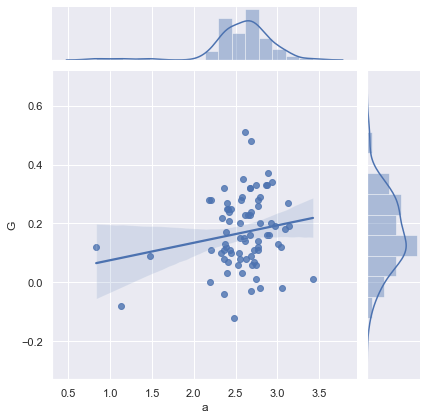

<Figure size 432x288 with 0 Axes>

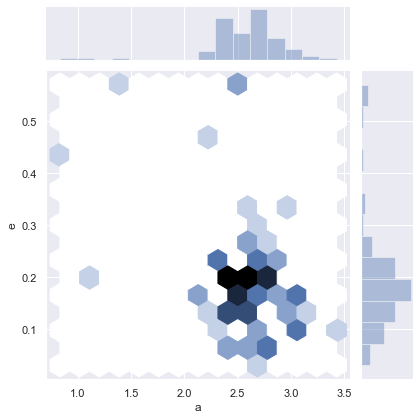

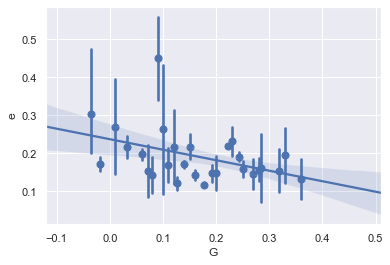

In [30]:
# Vamos a comprara algunas dimensiones numericas de forma enfrentada, puede que encontremos datos atipicos (outliers)
# Aqui hay 3 ejemplos visuales distintos
sns.jointplot(x="a", y="G", data=df, kind ='reg');
plt.figure()
sns.jointplot(x="a", y="e", data=df, kind='hex'); #Este se puede mejorar para que la densidad sea vea mejor
plt.figure()
sns.regplot(x='G', y='e', data=df, x_bins = 30, fit_reg = True, ci = 90) 

<Figure size 432x288 with 0 Axes>

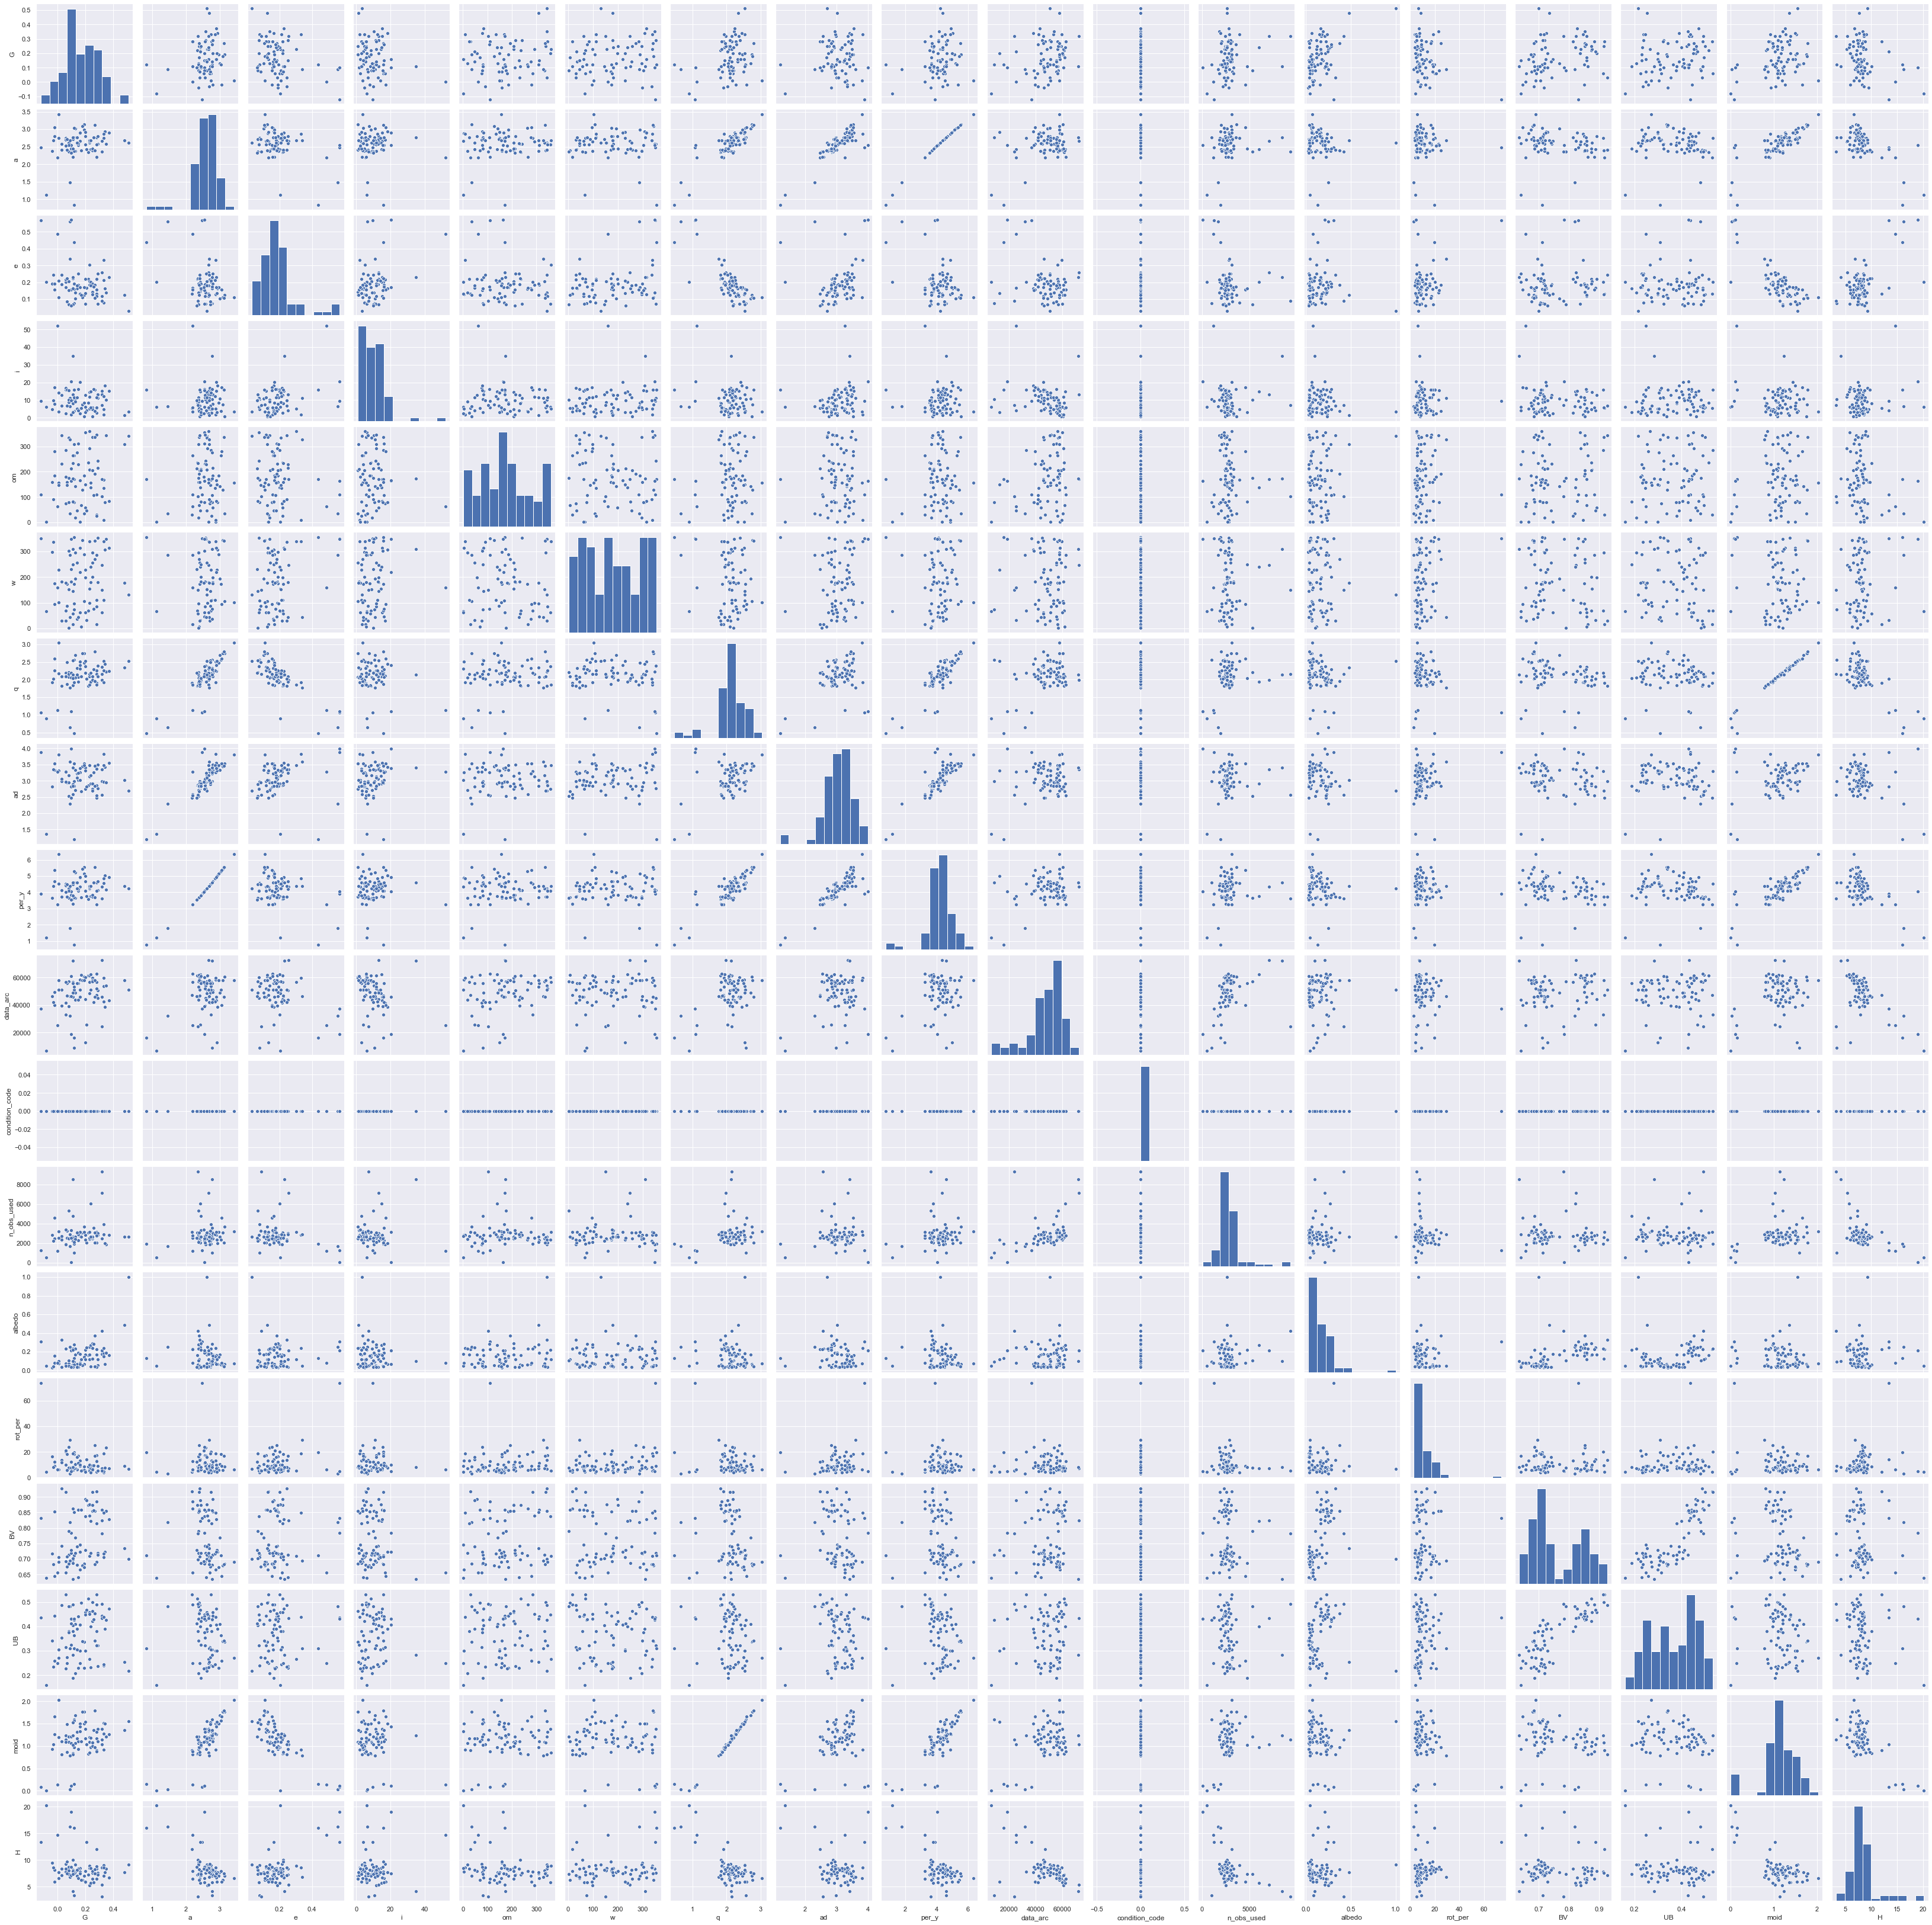

In [31]:
# Podemos comprar mas de 2 variables asi:
plt.figure()
sns.pairplot(df[['G', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'albedo', 'rot_per', 'BV', 'UB', 'moid', 'H']])

In [32]:
df.corr(method="pearson")

,a,e,G,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,albedo,rot_per,BV,UB,moid,Danger
a,1.000000,-0.363936,0.183832,-0.011989,0.100954,0.006641,0.839530,0.850592,0.994796,0.346423,NaN,0.162276,-0.617833,-0.116763,-0.038918,-0.165603,-0.097722,0.790762,0.456259
e,-0.363936,1.000000,-0.317751,0.348687,-0.132061,0.285426,-0.798617,0.167651,-0.353862,-0.298145,NaN,-0.250283,0.601487,-0.014411,0.338683,0.068440,0.038564,-0.791838,-0.475708
G,0.183832,-0.317751,1.000000,-0.185996,0.135979,0.087706,0.299994,0.015392,0.172471,0.264395,NaN,0.200777,-0.296817,0.485325,-0.273244,0.259670,0.134237,0.309570,0.215413
i,-0.011989,0.348687,-0.185996,1.000000,-0.035877,0.115376,-0.203351,0.176868,-0.010427,-0.236024,NaN,0.031613,0.129215,-0.192211,-0.011841,-0.165715,-0.022902,-0.191177,-0.027260
om,0.100954,-0.132061,0.135979,-0.035877,1.000000,-0.119641,0.132531,0.039632,0.086422,0.268600,NaN,-0.028407,-0.252319,0.152283,0.040267,0.089124,0.063279,0.126022,0.208408
w,0.006641,0.285426,0.087706,0.115376,-0.119641,1.000000,-0.140419,0.146945,0.023644,0.006197,NaN,0.004610,0.118396,-0.048882,0.216331,-0.126374,-0.104499,-0.112663,-0.098998
q,0.839530,-0.798617,0.299994,-0.203351,0.132531,-0.140419,1.000000,0.428409,0.838851,0.371555,NaN,0.237683,-0.728920,-0.073002,-0.232604,-0.173242,-0.098014,0.983344,0.553264
ad,0.850592,0.167651,0.015392,0.176868,0.039632,0.146945,0.428409,1.000000,0.842594,0.216540,NaN,0.039849,-0.322059,-0.123537,0.160393,-0.107749,-0.067663,0.363422,0.223347
per_y,0.994796,-0.353862,0.172471,-0.010427,0.086422,0.023644,0.838851,0.842594,1.000000,0.316570,NaN,0.151055,-0.594812,-0.137247,-0.043828,-0.201296,-0.127427,0.803383,0.435730
data_arc,0.346423,-0.298145,0.264395,-0.236024,0.268600,0.006197,0.371555,0.216540,0.316570,1.000000,NaN,0.394600,-0.521513,0.058809,-0.073449,0.147304,0.074805,0.336737,0.435274


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

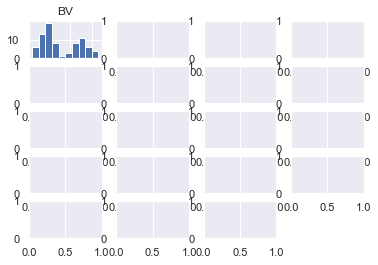

In [33]:
df.hist()
plt.show()

In [ ]:
sns.factorplot('rot_per',data=df,kind="count", aspect=3)
1
sns.factorplot('rot_per',data=df,kind="count", aspect=3)

In [ ]:
df = pd.read_csv("proyectoData.csv")
df['spec_B'].fillna(value='None', inplace=True)
df['spec_T'].fillna(value='None', inplace=True)
df['neo'].fillna(value='None', inplace=True)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["a","G","e","i", "om", "w"]] = scaler.fit_transform(df[["a","G","e","i", "om", "w"]])
plt.subplots(figsize=(20, 5))
sns.distplot(df[['a']], hist=False, label="a")
sns.distplot(df[['G']], hist=False, label="G")
sns.distplot(df[['e']], hist=False, label="e")
sns.distplot(df[['i']], hist=False, label="i")
sns.distplot(df[['om']], hist=False, label="om")
sns.distplot(df[['w']], hist=False, label="w")

In [ ]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

In [ ]:
y = "H"

x = "UB"

plt.scatter(x,y)

In [ ]:
avg_y = np.mean(y)
abs_val_minus_avg = abs(y - avg_y)
max_of_deviations = max(abs_val_minus_avg)
s = np.std(y)
Gcalculated = max_of_deviations/ s
print("Grubbs Calculated Value: {}".format(Gcalculated)) #Aquí tenemos el valor calculated